## Насколько в Питоновский список легко добавлять?

In [28]:
import time
import sys
import math

print("Наносекунд с 1970 г. прошло много", time.time_ns())
print("В int64 они влезут?.. ", time.time_ns() / (sys.maxsize / 2), "... похоже да, хотя запас небольшой")

to_try = [
    "0", "1",
    "2.718281828", "math.e",
    "[2.718281828] * 1000", "[math.e] * 1000",
    "[1] * 1000", "[time.time_ns()] * 1000"
]

for s in to_try:
    print(s, "takes", sys.getsizeof(eval(s)), "bytes")

Наносекунд с 1970 г. прошло много 1586110724617759500
В int64 они влезут?..  0.34393293868684305 ... похоже да, хотя запас небольшой
0 takes 24 bytes
1 takes 28 bytes
2.718281828 takes 24 bytes
math.e takes 24 bytes
[2.718281828] * 1000 takes 8056 bytes
[math.e] * 1000 takes 8056 bytes
[1] * 1000 takes 8056 bytes
[time.time_ns()] * 1000 takes 8056 bytes


In [29]:
lt = [0.0] * 250_000
l = []

print("Inserting at 0...")

for i in range(len(lt)):
    l.insert(0, 0)
    lt[i] = time.time()

print(f"Done. l takes {sys.getsizeof(l)} bytes.")

Inserting at 0...
Done. l takes 2115944 bytes.


Profiling...
Plotting...


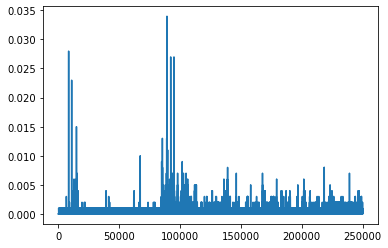

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Profiling...")
d = [
    t2 - t1 for t1, t2 in zip(lt[:-1], lt[1:])
]

print("Plotting...")

plt.plot(range(len(d)), d)
plt.show()

Smoothing...
Plotting...


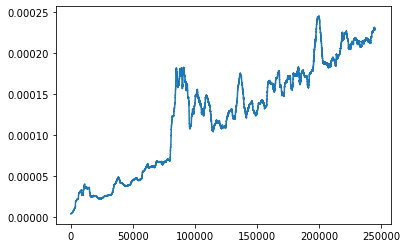

In [34]:
%matplotlib inline

import numpy as np
window_size = 5000

a0 = np.average(d[:window_size])

def windows():
    global a0
    for i in range(len(d)-window_size):
        yield a0
        a0 += (d[i+window_size] - d[i]) / window_size

print("Smoothing...")
averages = [a0] + [v for v in windows()]
print("Plotting...")

plt.plot(range(len(averages)), averages)
plt.show()